# Assignment 3: ICP + Non-linear least squares optimization

TEAM-ID: 16  <br>
TEAM-NAME: spacex <br>
YOUR-ID:  <br>
YOUR-NAME:   <br>



## Instructions

* Please check Moodle for "TEAM-ID" and "TEAM-NAME" fields above. Some of your names have been edited because of redundancy/simplicity. Instructions for submitting the assignment through GitHub Classrooms/Moodle has been uploaded on Moodle. Any clarifications will be made there itself.
* Code must be written in Python in Jupyter Notebooks. You can use Assignment-1's environment for this assignment. More instructions for setup provided as you progress through this assignment.
* Both the team members must submit the zip file.
* You are not allowed to use any external libraries (other than ones being imported below).
* Answer the descriptive questions in your own words with context & clarity. Do not just copy-paste from some Wikipedia page. You will be evaluated accordingly.
* You could split the Jupyter Notebook cells where TODO is written, but please try to avoid splitting/changing the structure of other cells.

In [1]:
# Only allowed to use these libraries for this assignment. 
# Setup: Just activate Assignment-1's environment and install matplotlib `python -m pip install -U matplotlib`

import numpy as np
import math
import matplotlib.pyplot as plt
import time

# Question 1: Simple Non-Linear least squares for Gaussian function

First, go through the [solved example here](https://www.notion.so/saishubodh/From-linear-algebra-to-non-linear-weighted-least-squares-13cf17d318be4d45bb8577c4d3ea4a02#1de60a8465664d39a12af24353feef9e) from the [notes page](https://www.notion.so/saishubodh/Mobile-Robotics-2020-Students-Page-0b65a9c20edd4081978f4ffad917febb#a68cabac64754fa485144cc89b4b8c65). After understanding this, 

(1.1) Code it from scratch using `numpy` and try it out yourself for say different number of iterations with a certain tolerance for all 50 observations using Gradient Descent. Make the following plots using `matplotlib`:
   * Data and fit plot: Ground truth Gaussian, observations (points) & predicted Gaussian on the same plot.
   * Cost function ($\|r\|^2$) vs number of iterations   
   
Experiment with the hyperparameters and compile your observations in a table. Clearly mention your hyperparameters with justification.

(1.2) You've used Gradient Descent above. Now implement Gauss-Newton and LM algorithms. To contrast between the three, you must experiment with 
   * Different initial estimate: Can a particular algorithm handle if the initial estimate is too far from GT?
   * Different number of observations: Can a particular algorithm handle very less observations?
   * Add [noise](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html) to your observations: Can a particular algorithm handle large noise?
   * What else can you think of? (For example, can an algorithm converge in less iterations compared to others?)
    
Make the plots (mentioned in 1.1) for all 3 algorithms. Report your observations in a table(s) (comparison between the three for different factors). You will be awarded depending on how comprehensive your experimentation is (which you have to explain below under "**Answers for Question 1**" section).

## Code for Question 1

In [2]:
#() Only numpy & matplotlib is sufficient for this question.
##############################################################################
# TODO: Do tasks described in Question 1                                     #
##############################################################################
# Replace "pass" statement with your code (You can split this cell into
# multiple cells if you wish to)
def gaussian(xVec, a, m, s):
    # Returning an array of gaussian sampled values dictated by the given parameters.
    return a*np.exp(-((xVec-m)**2)/(2*(s**2)))
    
def jacobian(xVec, a, m, s):
    # Calculates the Jacobian of the gaussian distribution.
    row1 = []
    row2 = []
    row3 = []
    
    for x in xVec:
        row1.append(math.exp(- (x - m) ** 2 / (2 * s ** 2))) 
        
    for x in xVec:
        row2.append((a* (x - m)/(s ** 2))*math.exp((- np.square(x - m) / (2 * np.square(s))))) 

    for x in xVec:
        row3.append((a/(s ** 3)) * ((x - m) ** 2) * math.exp((- (x - m) ** 2 / (2 * s ** 2)))) 
    
    row1 = np.array([row1])
    row2 = np.array([row2])
    row3 = np.array([row3])

    return np.vstack((row1, np.vstack((row2, row3)))).T
    
def residual(xVec, a, m, s, yObserved):
    # Calculating the residual, the difference between the observed and the calculated value
    obs = len(xVec)
    output = []
    
    for i in range(obs):
        output.append(a * math.exp(- (xVec[i] - m) ** 2 / (2 * s ** 2)) - yObserved[i])
    output = np.array(output)
        
    return output
    
def loss(xVec, a, m, s, yObserved):
    # Formulating loss as a non linear least squares optimization.
    obs = len(xVec)
    output = []
    for i in range(obs):
        output.append((a * math.exp(- (xVec[i] - m) ** 2 / (2 * s ** 2)) - yObserved[i])**2)
    output = np.array(output)
    return np.sum(output)

    
def plot(xObserved,yObserved, yPredicted,squaredDistance,tit):
    plt.figure(figsize=(12, 4))
    plt.subplot(121)
    plt.plot(squaredDistance)
    plt.title('loss vs number of iterations for '+str(tit))
    plt.xlabel('iterations')
    plt.ylabel('loss')
    plt.subplot(122)
    plt.plot(xObserved,yObserved,label='Ground Truth')
    plt.plot(xObserved,yPredicted,label='Predicted')
    plt.plot(xObserved,yObserved,'b.')
    
    plt.title('Predicted vs GT Gaussians by '+str(tit))
    plt.legend()
    plt.show()

def gradDescent(xObserved,yObserved,calculatedPrameters,lr,tolerance):
    converged = 0
    iterations = 500
    loss_arr = []
    for i in range(iterations):
        res = residual(xObserved, calculatedPrameters[0], calculatedPrameters[1], calculatedPrameters[2], yObserved)
        jack = jacobian(xObserved, calculatedPrameters[0], calculatedPrameters[1], calculatedPrameters[2])
        nllsJack = np.matmul(jack.T, res)
        calculatedPrameters = calculatedPrameters - lr * nllsJack

        squaredDistance = loss(xObserved, calculatedPrameters[0], calculatedPrameters[1], calculatedPrameters[2], yObserved)
        yPredicted = gaussian(xObserved, calculatedPrameters[0], calculatedPrameters[1], calculatedPrameters[2])
        loss_arr.append(squaredDistance)
        if np.sum(squaredDistance) < tolerance:
            print("Convergence in gradient descent achieved at",i," iteration")
            print("loss:",squaredDistance)
            print("a_est:",calculatedPrameters[0]," m_est:",calculatedPrameters[1], " s_est:",calculatedPrameters[2])
#             plot(xObserved,yObserved, yPredicted,np.array(loss_arr),"GD")
            converged = 1
            break
    if(converged==0):
        print("gradient descent algorithm did'nt converge in ",i," iterations for given parameters of tolerance",tolerance," learning rate",lr)
        print("loss:",squaredDistance)
        print("a_est:",calculatedPrameters[0]," m_est:",calculatedPrameters[1], " s_est:",calculatedPrameters[2])
#         plot(xObserved,yObserved, yPredicted,np.array(loss_arr),"Gradient Descent")
    return yPredicted,np.array(loss_arr)
def gaussNewton(xObserved,yObserved,calculatedPrameters,lr,tolerance):
    converged = 0
    iterations = 500
    loss_arr = []
    for i in range(iterations):
        res = residual(xObserved, calculatedPrameters[0], calculatedPrameters[1], calculatedPrameters[2], yObserved)
        jack = jacobian(xObserved, calculatedPrameters[0], calculatedPrameters[1], calculatedPrameters[2])
        calculatedPrameters = calculatedPrameters - np.linalg.pinv(jack)@res

        squaredDistance = loss(xObserved, calculatedPrameters[0], calculatedPrameters[1], calculatedPrameters[2], yObserved)
        yPredicted = gaussian(xObserved, calculatedPrameters[0], calculatedPrameters[1], calculatedPrameters[2])
        loss_arr.append(squaredDistance)
        if np.sum(squaredDistance) < tolerance:
            print("Convergence in Gauss Newton achieved at",i," iteration")
            print("loss:",squaredDistance)
            print("a_est:",calculatedPrameters[0]," m_est:",calculatedPrameters[1], " s_est:",calculatedPrameters[2])
#             plot(xObserved,yObserved, yPredicted,np.array(loss_arr),"Gauss Newton")
            converged = 0
            break
    if(converged==0):
        print("Gauss Newton Algorithm did'nt converge in ",i," iterations for given parameters of tolerance",tolerance," learning rate",lr)
        print("loss:",squaredDistance)
        print("a_est:",calculatedPrameters[0]," m_est:",calculatedPrameters[1], " s_est:",calculatedPrameters[2])
#         plot(xObserved,yObserved, yPredicted,np.array(loss_arr),"Gauss Newton")
    return yPredicted,np.array(loss_arr)
def LM(xObserved,yObserved,calculatedPrameters,lr,tolerance):
    iterations = 500
    loss_arr = []
    converged = 0
    for i in range(iterations):
        res = residual(xObserved, calculatedPrameters[0], calculatedPrameters[1], calculatedPrameters[2], yObserved)
        jack = jacobian(xObserved, calculatedPrameters[0], calculatedPrameters[1], calculatedPrameters[2])
        jack = jack.astype('float64') 
        I_lr = lr*np.eye(jack.shape[1])
        I_lr = I_lr.astype('float64') 
        nllsJack = np.linalg.pinv((jack.T@jack)+(I_lr))@jack.T   
                
        calculatedPrameters = calculatedPrameters - nllsJack@res
        currloss = loss(xObserved, calculatedPrameters[0], calculatedPrameters[1], calculatedPrameters[2], yObserved)
        
        if(i!=0):
            if currloss<=squaredDistance:
                lr/= 10
            else:
                lr*= 10
    
        jack = jacobian(xObserved, calculatedPrameters[0], calculatedPrameters[1], calculatedPrameters[2])
        jack = jack.astype('float64') 
        I_lr = lr*np.eye(jack.shape[1])
        I_lr = I_lr.astype('float64') 
        nllsJack = np.linalg.pinv((jack.T@jack)+(I_lr))@jack.T   
                
        calculatedPrameters = calculatedPrameters - nllsJack@res

        squaredDistance = loss(xObserved, calculatedPrameters[0], calculatedPrameters[1], calculatedPrameters[2], yObserved)
        yPredicted = gaussian(xObserved, calculatedPrameters[0], calculatedPrameters[1], calculatedPrameters[2])
        loss_arr.append(squaredDistance)
        if np.sum(squaredDistance) < tolerance:
            print("Convergence in LM achieved at",i," iteration")
            print("loss:",squaredDistance)
            print("a_est:",calculatedPrameters[0]," m_est:",calculatedPrameters[1], " s_est:",calculatedPrameters[2])
#             plot(xObserved,yObserved, yPredicted,np.array(loss_arr),"LM")
            converged =1
            
            break
    if(converged==0):
        print("LM Algorithm did'nt converge in ",i," iterations for given parameters of tolerance",tolerance," learning rate",lr)
        print("loss:",squaredDistance)
        print("a_est:",calculatedPrameters[0]," m_est:",calculatedPrameters[1], " s_est:",calculatedPrameters[2])
#         plot(xObserved,yObserved, yPredicted,np.array(loss_arr),"LM")
    return yPredicted,np.array(loss_arr)
##############################################################################
#                             END OF YOUR CODE                               #
##############################################################################


In [3]:
def combinedplot(xObserved,yObserved,ygd,lgd,ygn,lgn,ylm,llm):
    plt.figure(figsize=(12, 4))
    plt.subplot(121)
    plt.plot(lgd,'r--',label='GD')
    plt.plot(lgn,'m.',label='GN')
    plt.plot(llm,'g*',label='LM')
    plt.title('loss vs number of iterations')
    plt.xlabel('iterations')
    plt.ylabel('loss')
    plt.legend()


    plt.subplot(122)
    plt.plot(xObserved,yObserved,label='Ground Truth')
    plt.plot(xObserved,yObserved,'b.')
    plt.plot(xObserved,ygd,'r',label='GD')
    plt.plot(xObserved,ygn,'m',label='GN')
    plt.plot(xObserved,ylm,'g',label='LM')
    plt.title('Combined Data and fit plot')
    plt.legend()
    
    plt.show()
    

Convergence in gradient descent achieved at 437  iteration
loss: 0.00983855224832958
a_est: 9.983879338286183  m_est: 0.0003810694168602857  s_est: 20.089773728976823


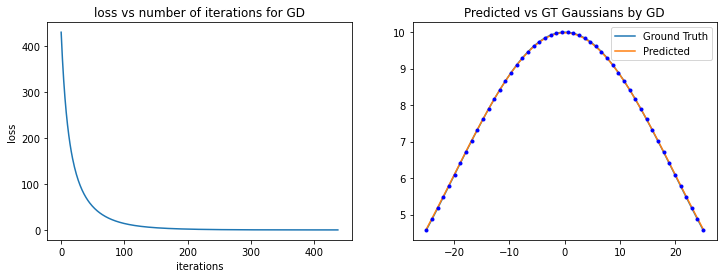

Convergence in Gauss Newton achieved at 3  iteration
loss: 6.229699393620347e-05
a_est: 9.998337196905194  m_est: 0.002102935591206556  s_est: 20.00402659090192
Gauss Newton Algorithm did'nt converge in  3  iterations for given parameters of tolerance 0.01  learning rate 0.01
loss: 6.229699393620347e-05
a_est: 9.998337196905194  m_est: 0.002102935591206556  s_est: 20.00402659090192


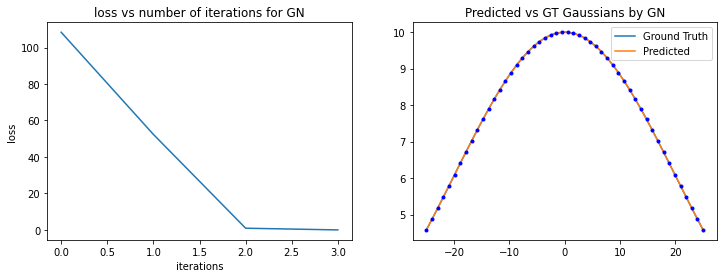

Convergence in LM achieved at 2  iteration
loss: 5.730362110598665
a_est: 10.254077061575403  m_est: -1.0498505979479578  s_est: 18.798688886556167


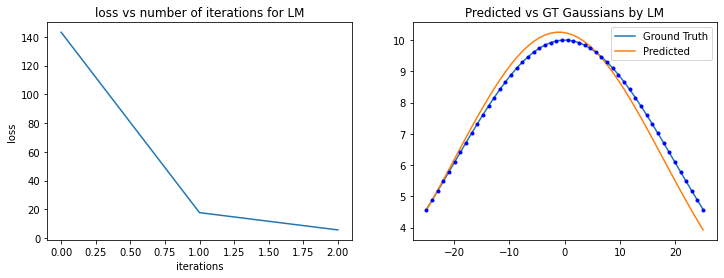

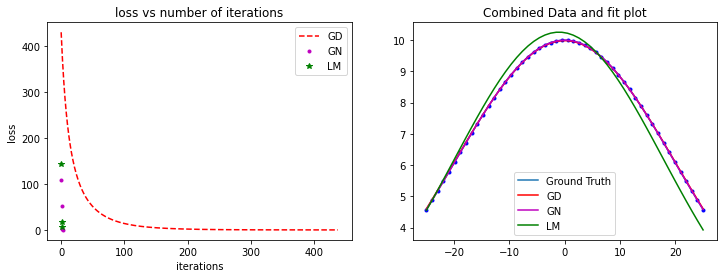

In [4]:
## Define the plots inside a function above and call them in this cell one by one. When I run this cell, all plots
## asked in Q1 should be generated. 
##############################################################################
# TODO: Plotting for Question 1                                              #
# Tester code -- EVERYTHING IN ONE CELL

numberOfObservations = 50
xObserved = np.linspace(-25, 25, numberOfObservations)
a_gt = 10
m_gt = 0
s_gt = 20
a_est = 10
m_est = 13
s_est = 19.12
yObserved = gaussian(xObserved, a_gt, m_gt, s_gt)
calculatedPrameters = np.array([a_est, m_est, s_est])

ygd,lgd = gradDescent(xObserved,yObserved,calculatedPrameters,0.01,1e-2)
plot(xObserved,yObserved,ygd, lgd,"GD")
ygn,lgn = gaussNewton(xObserved,yObserved,calculatedPrameters,0.01,1e-2)
plot(xObserved,yObserved, ygn, lgn,"GN")
ylm,llm= LM(xObserved,yObserved,calculatedPrameters,10,1e+1)
plot(xObserved,yObserved, ylm, llm,"LM")
combinedplot(xObserved,yObserved,ygd,lgd,ygn,lgn,ylm,llm)



##############################################################################
#                             END OF YOUR CODE                               #
##############################################################################

# Optimising Gradient descent parameters

gradient descent algorithm did'nt converge in  499  iterations for given parameters of tolerance 0.001  learning rate 0.01
loss: 0.002265663108877982
a_est: 9.992264279823202  m_est: 6.630372294230427e-05  s_est: 20.042956236035895


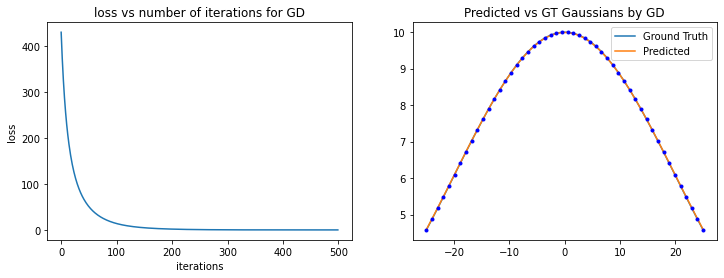

In [5]:

ygd,lgd = gradDescent(xObserved,yObserved,calculatedPrameters,0.01,1e-3)
plot(xObserved,yObserved,ygd, lgd,"GD")

gradient descent algorithm did'nt converge in  499  iterations for given parameters of tolerance 0.001  learning rate 0.01
loss: 0.002265663108877982
a_est: 9.992264279823202  m_est: 6.630372294230427e-05  s_est: 20.042956236035895


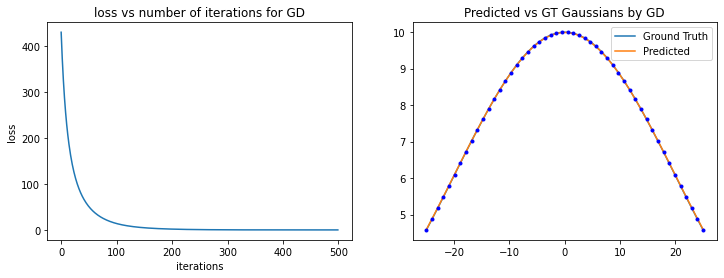

Convergence in gradient descent achieved at 437  iteration
loss: 0.00983855224832958
a_est: 9.983879338286183  m_est: 0.0003810694168602857  s_est: 20.089773728976823


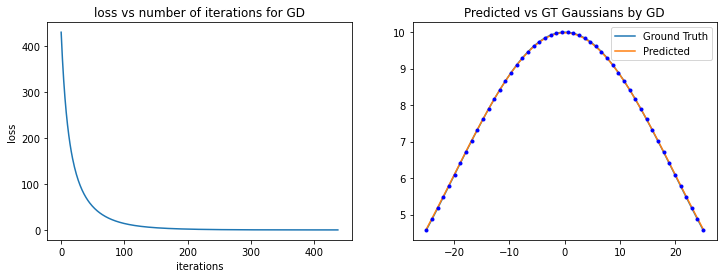

Convergence in gradient descent achieved at 337  iteration
loss: 0.09899244775254672
a_est: 9.948877534392215  m_est: 0.006139702817200705  s_est: 20.288135634862776


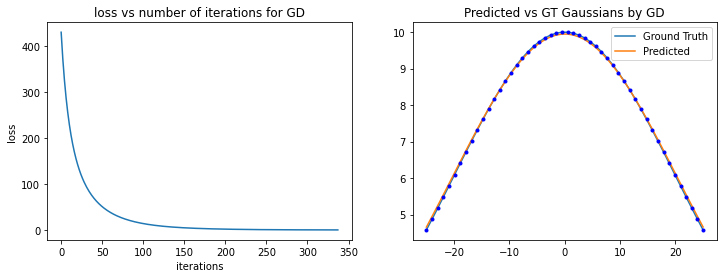

Convergence in gradient descent achieved at 229  iteration
loss: 0.9871879843820822
a_est: 9.840596816487373  m_est: 0.10601728929519547  s_est: 20.93342186690136


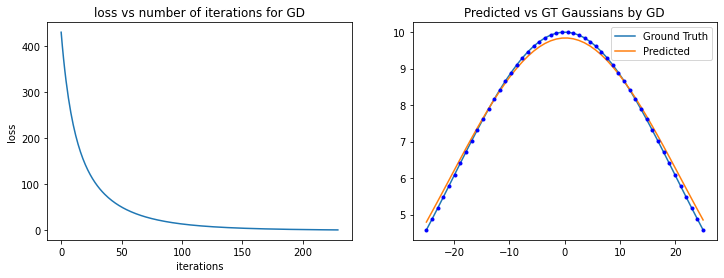

Convergence in gradient descent achieved at 115  iteration
loss: 9.829260268328731
a_est: 9.608692938123435  m_est: 1.4171677571178727  s_est: 22.522468934557253


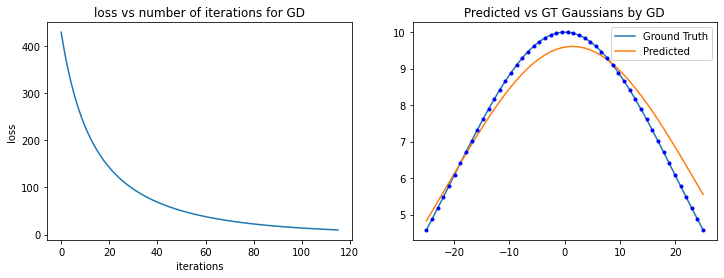

Convergence in gradient descent achieved at 30  iteration
loss: 96.50726091112924
a_est: 9.640735602761751  m_est: 6.91689953829249  s_est: 22.826981339510326


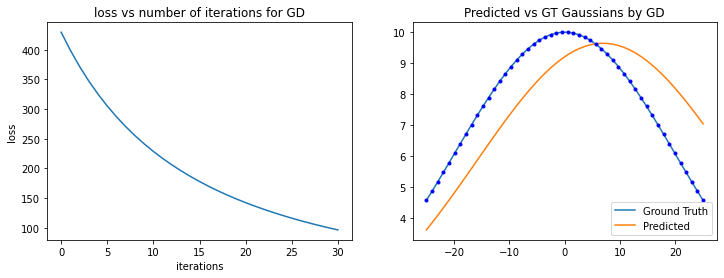

In [6]:
tolerance = [1e-3,1e-2,1e-1,1,1e+1,1e+2]
for t in tolerance:
    ygd,lgd = gradDescent(xObserved,yObserved,calculatedPrameters,0.01,t)
    plot(xObserved,yObserved,ygd, lgd,"GD")

As we see on increasing tolerance the algo converges in less number of iterations but loss starts increasing

# Comparing among the 3 algorithms 

Setting learning rate for LM as 10, from experimentations(on reducing it doesnt converge(explanable since learning rate is multiplied or divided by 10 depending on error is reduced or increased)


 tolerance  0.001
gradient descent algorithm did'nt converge in  499  iterations for given parameters of tolerance 0.001  learning rate 0.01
loss: 0.002265663108877982
a_est: 9.992264279823202  m_est: 6.630372294230427e-05  s_est: 20.042956236035895
Convergence in Gauss Newton achieved at 3  iteration
loss: 6.229699393620347e-05
a_est: 9.998337196905194  m_est: 0.002102935591206556  s_est: 20.00402659090192
Gauss Newton Algorithm did'nt converge in  3  iterations for given parameters of tolerance 0.001  learning rate 0.01
loss: 6.229699393620347e-05
a_est: 9.998337196905194  m_est: 0.002102935591206556  s_est: 20.00402659090192
LM Algorithm did'nt converge in  499  iterations for given parameters of tolerance 0.001  learning rate 0.0
loss: 6.329028917403209
a_est: 9.483840975782126  m_est: 0.1751271492922382  s_est: 20.545360190343008


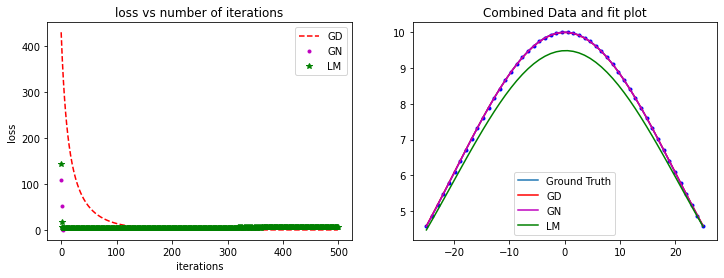


 tolerance  0.01
Convergence in gradient descent achieved at 437  iteration
loss: 0.00983855224832958
a_est: 9.983879338286183  m_est: 0.0003810694168602857  s_est: 20.089773728976823
Convergence in Gauss Newton achieved at 3  iteration
loss: 6.229699393620347e-05
a_est: 9.998337196905194  m_est: 0.002102935591206556  s_est: 20.00402659090192
Gauss Newton Algorithm did'nt converge in  3  iterations for given parameters of tolerance 0.01  learning rate 0.01
loss: 6.229699393620347e-05
a_est: 9.998337196905194  m_est: 0.002102935591206556  s_est: 20.00402659090192
LM Algorithm did'nt converge in  499  iterations for given parameters of tolerance 0.01  learning rate 0.0
loss: 6.329028917403209
a_est: 9.483840975782126  m_est: 0.1751271492922382  s_est: 20.545360190343008


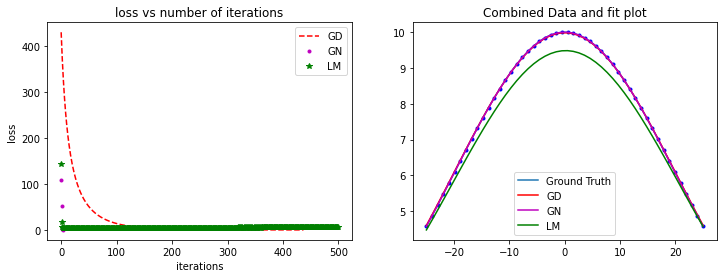


 tolerance  0.1
Convergence in gradient descent achieved at 337  iteration
loss: 0.09899244775254672
a_est: 9.948877534392215  m_est: 0.006139702817200705  s_est: 20.288135634862776
Convergence in Gauss Newton achieved at 3  iteration
loss: 6.229699393620347e-05
a_est: 9.998337196905194  m_est: 0.002102935591206556  s_est: 20.00402659090192
Gauss Newton Algorithm did'nt converge in  3  iterations for given parameters of tolerance 0.1  learning rate 0.01
loss: 6.229699393620347e-05
a_est: 9.998337196905194  m_est: 0.002102935591206556  s_est: 20.00402659090192
LM Algorithm did'nt converge in  499  iterations for given parameters of tolerance 0.1  learning rate 0.0
loss: 6.329028917403209
a_est: 9.483840975782126  m_est: 0.1751271492922382  s_est: 20.545360190343008


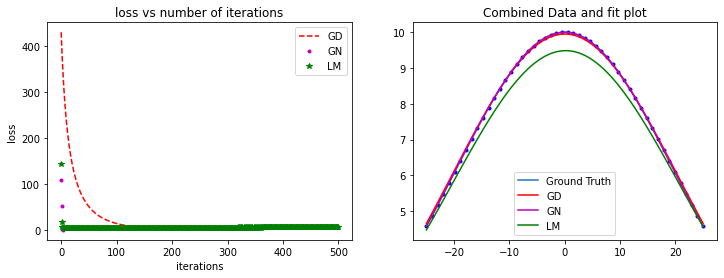


 tolerance  1.0
Convergence in gradient descent achieved at 229  iteration
loss: 0.9871879843820822
a_est: 9.840596816487373  m_est: 0.10601728929519547  s_est: 20.93342186690136
Convergence in Gauss Newton achieved at 2  iteration
loss: 0.9331254378985017
a_est: 9.88531666444999  m_est: -0.36198719732811213  s_est: 19.907238165300324
Gauss Newton Algorithm did'nt converge in  2  iterations for given parameters of tolerance 1.0  learning rate 0.01
loss: 0.9331254378985017
a_est: 9.88531666444999  m_est: -0.36198719732811213  s_est: 19.907238165300324
LM Algorithm did'nt converge in  499  iterations for given parameters of tolerance 1.0  learning rate 0.0
loss: 6.329028917403209
a_est: 9.483840975782126  m_est: 0.1751271492922382  s_est: 20.545360190343008


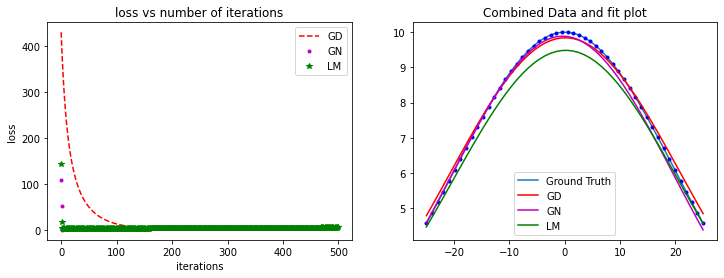


 tolerance  10.0
Convergence in gradient descent achieved at 115  iteration
loss: 9.829260268328731
a_est: 9.608692938123435  m_est: 1.4171677571178727  s_est: 22.522468934557253
Convergence in Gauss Newton achieved at 2  iteration
loss: 0.9331254378985017
a_est: 9.88531666444999  m_est: -0.36198719732811213  s_est: 19.907238165300324
Gauss Newton Algorithm did'nt converge in  2  iterations for given parameters of tolerance 10.0  learning rate 0.01
loss: 0.9331254378985017
a_est: 9.88531666444999  m_est: -0.36198719732811213  s_est: 19.907238165300324
Convergence in LM achieved at 2  iteration
loss: 5.730362110598665
a_est: 10.254077061575403  m_est: -1.0498505979479578  s_est: 18.798688886556167


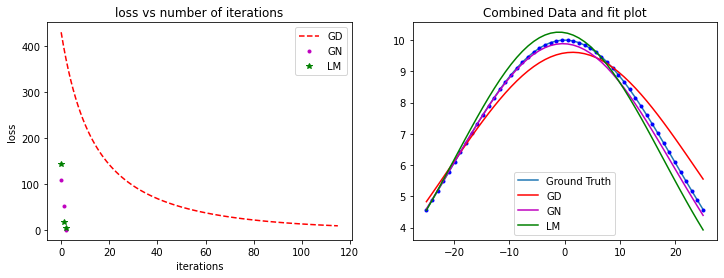


 tolerance  100.0
Convergence in gradient descent achieved at 30  iteration
loss: 96.50726091112924
a_est: 9.640735602761751  m_est: 6.91689953829249  s_est: 22.826981339510326
Convergence in Gauss Newton achieved at 1  iteration
loss: 52.36132656683978
a_est: 9.855255737881372  m_est: -2.4823688211532247  s_est: 17.191041633602573
Gauss Newton Algorithm did'nt converge in  1  iterations for given parameters of tolerance 100.0  learning rate 0.01
loss: 52.36132656683978
a_est: 9.855255737881372  m_est: -2.4823688211532247  s_est: 17.191041633602573
Convergence in LM achieved at 1  iteration
loss: 17.75304170370217
a_est: 9.259792284703648  m_est: 1.6736784343233468  s_est: 23.874714922894466


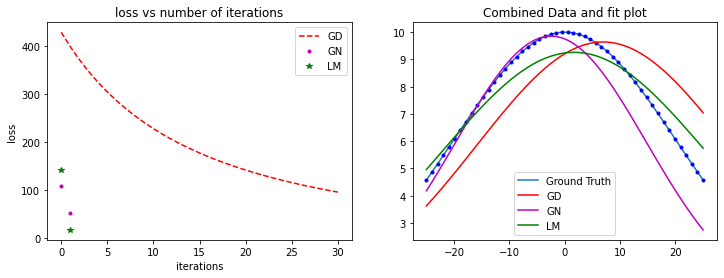

In [7]:

numberOfObservations = 50
xObserved = np.linspace(-25, 25, numberOfObservations)
a_gt = 10
m_gt = 0
s_gt = 20
a_est = 10
m_est = 13
s_est = 19.12
yObserved = gaussian(xObserved, a_gt, m_gt, s_gt)
calculatedPrameters = np.array([a_est, m_est, s_est])
tolerance = np.array([1e-3,1e-2,1e-1,1,1e+1,1e+2])
for tol in tolerance:
    print("\n tolerance ",tol)
    ygd,lgd = gradDescent(xObserved,yObserved,calculatedPrameters,0.01,tol)
    ygn,lgn = gaussNewton(xObserved,yObserved,calculatedPrameters,0.01,tol)
    ylm,llm= LM(xObserved,yObserved,calculatedPrameters,10,tol)
    combinedplot(xObserved,yObserved,ygd,lgd,ygn,lgn,ylm,llm)


Different initial estimate: Can a particular algorithm handle if the initial estimate is too far from GT?

for a_est: 20.0  m_est: 13.0  s_est: 19.2
Convergence in gradient descent achieved at 401  iteration
loss: 0.009796680630617503
a_est: 9.983914372250908  m_est: 0.0006691704240702463  s_est: 20.08957755979924
Convergence in Gauss Newton achieved at 3  iteration
loss: 0.000299813684922257
a_est: 9.997568405154453  m_est: -0.007860524973484884  s_est: 20.003165014529056
Gauss Newton Algorithm did'nt converge in  3  iterations for given parameters of tolerance 0.01  learning rate 0.01
loss: 0.000299813684922257
a_est: 9.997568405154453  m_est: -0.007860524973484884  s_est: 20.003165014529056
LM Algorithm did'nt converge in  499  iterations for given parameters of tolerance 10.0  learning rate 0.0
loss: 4.79736635786057e+43
a_est: 9.813379236052704e+20  m_est: -4.059551403199951e+22  s_est: 6.679279141606061e+23


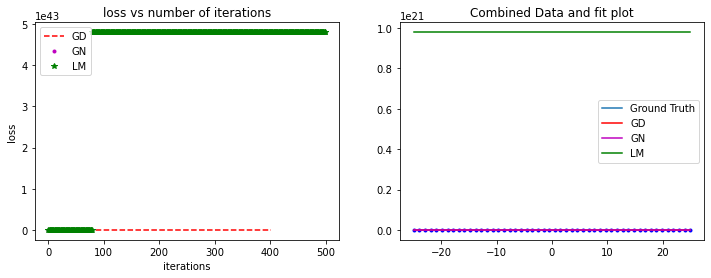

for a_est: 15.0  m_est: 15.0  s_est: 30.0
gradient descent algorithm did'nt converge in  499  iterations for given parameters of tolerance 0.01  learning rate 0.01
loss: 13.15901146422067
a_est: 9.405386191824626  m_est: 0.18754138004744558  s_est: 24.137573662180216
Convergence in Gauss Newton achieved at 2  iteration
loss: 0.004347443763877181
a_est: 9.984687614860787  m_est: -0.0008925681619234016  s_est: 20.031617130516278
Gauss Newton Algorithm did'nt converge in  2  iterations for given parameters of tolerance 0.01  learning rate 0.01
loss: 0.004347443763877181
a_est: 9.984687614860787  m_est: -0.0008925681619234016  s_est: 20.031617130516278
LM Algorithm did'nt converge in  499  iterations for given parameters of tolerance 10.0  learning rate 0.0
loss: 767.487946374208
a_est: 14.933830319770362  m_est: 0.04625951157811224  s_est: 19.782304571176674


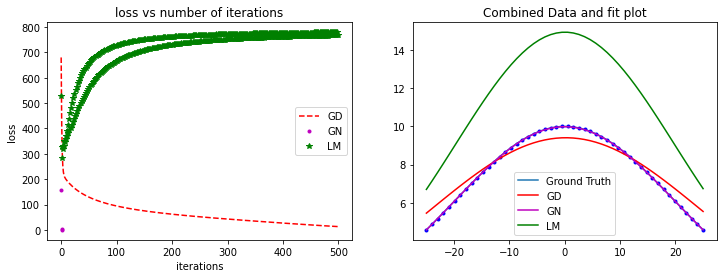

for a_est: 0.0  m_est: 5.0  s_est: 30.0
gradient descent algorithm did'nt converge in  499  iterations for given parameters of tolerance 0.01  learning rate 0.01
loss: 0.3537905523240515
a_est: 9.903265002642627  m_est: 0.0015812402590576053  s_est: 20.55394415905725
Convergence in Gauss Newton achieved at 4  iteration
loss: 8.389378771688895e-06
a_est: 9.999896348612031  m_est: -0.0009580232171931269  s_est: 19.998668017574058
Gauss Newton Algorithm did'nt converge in  4  iterations for given parameters of tolerance 0.01  learning rate 0.01
loss: 8.389378771688895e-06
a_est: 9.999896348612031  m_est: -0.0009580232171931269  s_est: 19.998668017574058
LM Algorithm did'nt converge in  499  iterations for given parameters of tolerance 10.0  learning rate 0.0
loss: 504.9481840646709
a_est: 6.028981829773745  m_est: 0.04697477869709113  s_est: 20.145914209640697


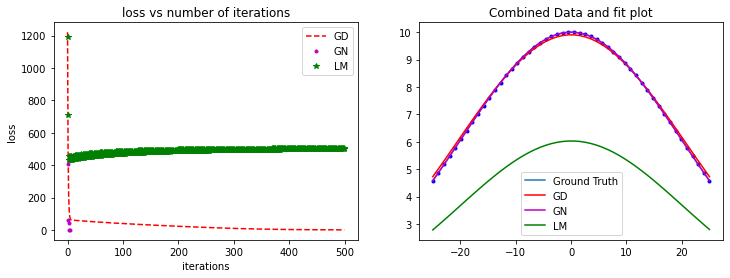

for a_est: 10.0  m_est: 5.0  s_est: 45.0
gradient descent algorithm did'nt converge in  499  iterations for given parameters of tolerance 0.01  learning rate 0.01
loss: 79.85676866608442
a_est: 8.49286292813458  m_est: 1.5977399438723476  s_est: 38.900547294118624
Convergence in Gauss Newton achieved at 4  iteration
loss: 2.8551279852934357e-06
a_est: 9.999949564582622  m_est: -0.000549485613638781  s_est: -19.99918552898828
Gauss Newton Algorithm did'nt converge in  4  iterations for given parameters of tolerance 0.01  learning rate 0.01
loss: 2.8551279852934357e-06
a_est: 9.999949564582622  m_est: -0.000549485613638781  s_est: -19.99918552898828
LM Algorithm did'nt converge in  499  iterations for given parameters of tolerance 10.0  learning rate 0.0
loss: 139.15781206815888
a_est: 12.12002195051453  m_est: 0.0030198301922845765  s_est: 19.794062155516453


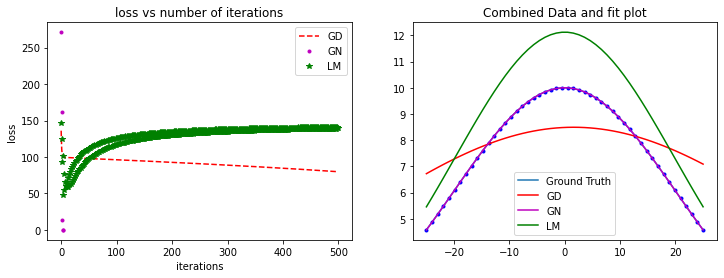

In [8]:
numberOfObservations = 50
xObserved = np.linspace(-25, 25, numberOfObservations)
a_gt = 10
m_gt = 0
s_gt = 20
yObserved = gaussian(xObserved, a_gt, m_gt, s_gt)
ests = np.array([[20,13,19.2],[15,15,30],[0,5,30],[10,5,45]])
for calculatedPrameters in ests:
    print("for a_est:",calculatedPrameters[0]," m_est:",calculatedPrameters[1], " s_est:",calculatedPrameters[2])
    ygd,lgd = gradDescent(xObserved,yObserved,calculatedPrameters,0.01,1e-2)
    ygn,lgn = gaussNewton(xObserved,yObserved,calculatedPrameters,0.01,1e-2)
    ylm,llm= LM(xObserved,yObserved,calculatedPrameters,10,1e+1)
    combinedplot(xObserved,yObserved,ygd,lgd,ygn,lgn,ylm,llm)


Observation: gauss newton is able to handle really far off estimates well, Gradient descent too handles to some extent. But LM is not able to handle

Different number of observations: Can a particular algorithm handle very less observations?

for 3 observations
gradient descent algorithm did'nt converge in  499  iterations for given parameters of tolerance 0.01  learning rate 0.01
loss: 13.037673570961797
a_est: 7.270942069618003  m_est: 4.657814366890058  s_est: 44.25381124616506
Convergence in Gauss Newton achieved at 3  iteration
loss: 6.392625656043453e-05
a_est: 9.998244588638427  m_est: -0.0036187727889811505  s_est: -19.98710431578631
Gauss Newton Algorithm did'nt converge in  3  iterations for given parameters of tolerance 0.01  learning rate 0.01
loss: 6.392625656043453e-05
a_est: 9.998244588638427  m_est: -0.0036187727889811505  s_est: -19.98710431578631
Convergence in LM achieved at 3  iteration
loss: 5.8713982825295865
a_est: 7.912261994938874  m_est: -0.5284501715846743  s_est: 28.89854552453879


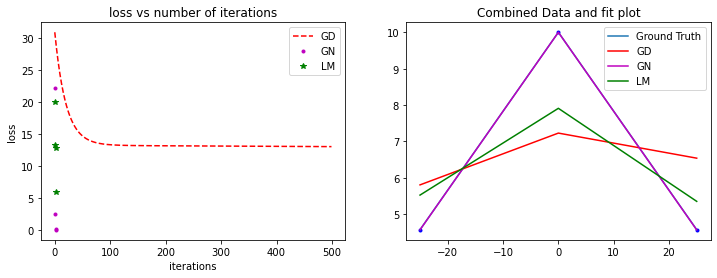

for 5 observations
gradient descent algorithm did'nt converge in  499  iterations for given parameters of tolerance 0.01  learning rate 0.01
loss: 14.91822632151035
a_est: 7.841338620959291  m_est: 4.492202633278072  s_est: 44.14412201601991
Convergence in Gauss Newton achieved at 3  iteration
loss: 0.0070155988244037714
a_est: 9.982448276627636  m_est: 0.03373519885723952  s_est: -19.892406162819146
Gauss Newton Algorithm did'nt converge in  3  iterations for given parameters of tolerance 0.01  learning rate 0.01
loss: 0.0070155988244037714
a_est: 9.982448276627636  m_est: 0.03373519885723952  s_est: -19.892406162819146
Convergence in LM achieved at 3  iteration
loss: 5.217692398340133
a_est: 8.315350470432676  m_est: -1.4110666938617307  s_est: 25.4091574580058


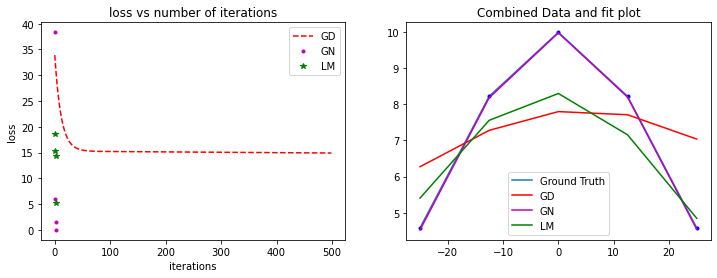

for 8 observations
gradient descent algorithm did'nt converge in  499  iterations for given parameters of tolerance 0.01  learning rate 0.01
loss: 19.93324626649654
a_est: 8.091618406151927  m_est: 4.249605876681988  s_est: 43.884512749659045
Convergence in Gauss Newton achieved at 3  iteration
loss: 0.0077302806827764395
a_est: 9.988577199087958  m_est: -0.030128415358789074  s_est: -19.89809957757157
Gauss Newton Algorithm did'nt converge in  3  iterations for given parameters of tolerance 0.01  learning rate 0.01
loss: 0.0077302806827764395
a_est: 9.988577199087958  m_est: -0.030128415358789074  s_est: -19.89809957757157
LM Algorithm did'nt converge in  499  iterations for given parameters of tolerance 10.0  learning rate 0.0
loss: 39.70396496946297
a_est: 7.079386220274361  m_est: -0.05274464591478652  s_est: 20.236218280470357


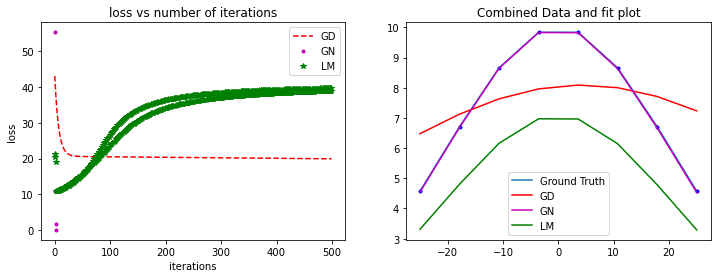

for 10 observations
gradient descent algorithm did'nt converge in  499  iterations for given parameters of tolerance 0.01  learning rate 0.01
loss: 23.336110221374618
a_est: 8.168626269360796  m_est: 4.092181992376912  s_est: 43.69635573326496
Convergence in Gauss Newton achieved at 3  iteration
loss: 0.00786459119096223
a_est: 9.985447214572805  m_est: -0.05710307896642841  s_est: -19.93203448923023
Gauss Newton Algorithm did'nt converge in  3  iterations for given parameters of tolerance 0.01  learning rate 0.01
loss: 0.00786459119096223
a_est: 9.985447214572805  m_est: -0.05710307896642841  s_est: -19.93203448923023
Convergence in LM achieved at 34  iteration
loss: 9.616738605368425
a_est: 10.148694738654903  m_est: 1.6299933236885857  s_est: 24.564089268726534


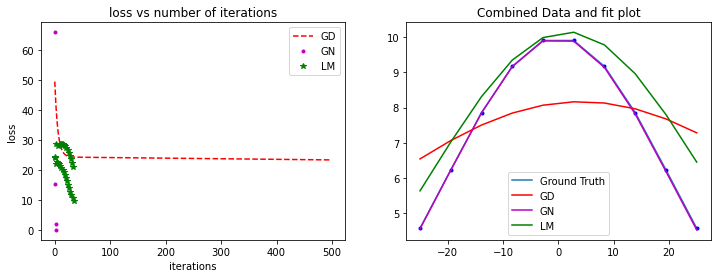

for 12 observations
gradient descent algorithm did'nt converge in  499  iterations for given parameters of tolerance 0.01  learning rate 0.01
loss: 26.719392426767197
a_est: 8.219221139536792  m_est: 3.9380332961261186  s_est: 43.50119194350103
Convergence in Gauss Newton achieved at 3  iteration
loss: 0.008471865756035276
a_est: 9.98075694969458  m_est: -0.06882382598615511  s_est: -19.966465184641056
Gauss Newton Algorithm did'nt converge in  3  iterations for given parameters of tolerance 0.01  learning rate 0.01
loss: 0.008471865756035276
a_est: 9.98075694969458  m_est: -0.06882382598615511  s_est: -19.966465184641056
Convergence in LM achieved at 18  iteration
loss: 9.093464095359423
a_est: 9.830295820931154  m_est: 1.148283748311746  s_est: 25.362710491137953


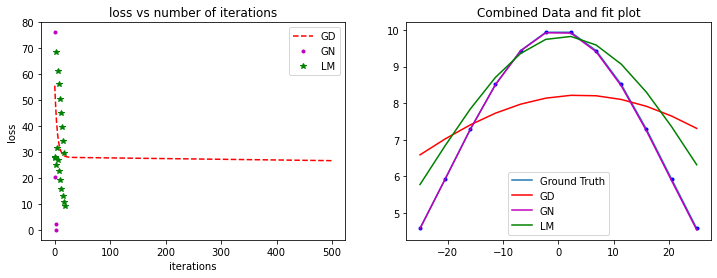

for 15 observations
gradient descent algorithm did'nt converge in  499  iterations for given parameters of tolerance 0.01  learning rate 0.01
loss: 31.72404143665039
a_est: 8.270305197824472  m_est: 3.712835584794412  s_est: 43.19805898164668
Convergence in Gauss Newton achieved at 3  iteration
loss: 0.009719032635457953
a_est: 9.974072170598296  m_est: -0.06938762605330862  s_est: -20.008381454161505
Gauss Newton Algorithm did'nt converge in  3  iterations for given parameters of tolerance 0.01  learning rate 0.01
loss: 0.009719032635457953
a_est: 9.974072170598296  m_est: -0.06938762605330862  s_est: -20.008381454161505
Convergence in LM achieved at 12  iteration
loss: 8.598591578616553
a_est: 9.112304672452595  m_est: 0.6918892259159876  s_est: 26.43441807026739


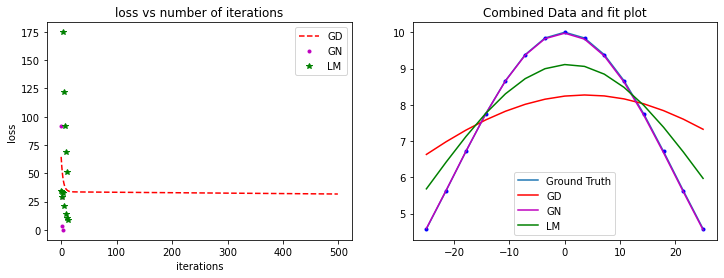

for 20 observations
gradient descent algorithm did'nt converge in  499  iterations for given parameters of tolerance 0.01  learning rate 0.01
loss: 39.825299874078
a_est: 8.32442695373583  m_est: 3.353314172833526  s_est: 42.66893938049526
Convergence in Gauss Newton achieved at 4  iteration
loss: 2.3857578173174504e-07
a_est: 9.999961027966563  m_est: 0.00033668476813428216  s_est: -19.99976952720658
Gauss Newton Algorithm did'nt converge in  4  iterations for given parameters of tolerance 0.01  learning rate 0.01
loss: 2.3857578173174504e-07
a_est: 9.999961027966563  m_est: 0.00033668476813428216  s_est: -19.99976952720658
LM Algorithm did'nt converge in  499  iterations for given parameters of tolerance 10.0  learning rate 0.0
loss: 47.31196381910473
a_est: 11.98452292488438  m_est: -0.002807635989470335  s_est: 19.771475537180212


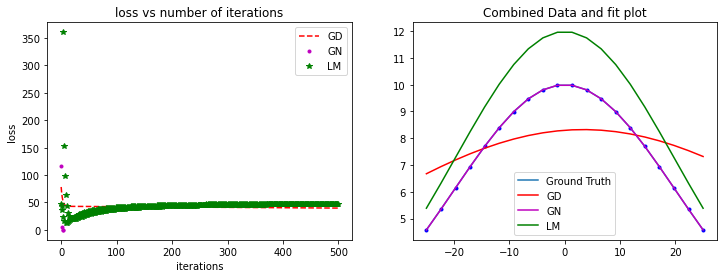

for 22 observations
gradient descent algorithm did'nt converge in  499  iterations for given parameters of tolerance 0.01  learning rate 0.01
loss: 42.97167713951895
a_est: 8.340551472227823  m_est: 3.21497116401385  s_est: 42.44944510525553
Convergence in Gauss Newton achieved at 4  iteration
loss: 3.271145691785934e-07
a_est: 9.999969172763976  m_est: 0.0003167783836811183  s_est: -19.999638954474374
Gauss Newton Algorithm did'nt converge in  4  iterations for given parameters of tolerance 0.01  learning rate 0.01
loss: 3.271145691785934e-07
a_est: 9.999969172763976  m_est: 0.0003167783836811183  s_est: -19.999638954474374
LM Algorithm did'nt converge in  499  iterations for given parameters of tolerance 10.0  learning rate 0.0
loss: 62.27713481348441
a_est: 12.159973848524661  m_est: -0.0021178292288822707  s_est: 19.78666288101782


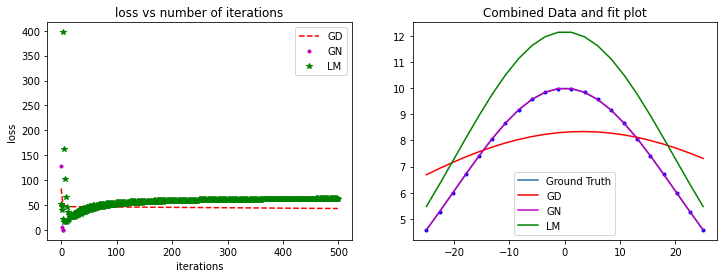

for 25 observations
gradient descent algorithm did'nt converge in  499  iterations for given parameters of tolerance 0.01  learning rate 0.01
loss: 47.582568669041805
a_est: 8.361469876831858  m_est: 3.013254850082394  s_est: 42.11197519994943
Convergence in Gauss Newton achieved at 4  iteration
loss: 4.738859213669028e-07
a_est: 9.999978227404668  m_est: 0.00024522361793435574  s_est: -19.9994749139841
Gauss Newton Algorithm did'nt converge in  4  iterations for given parameters of tolerance 0.01  learning rate 0.01
loss: 4.738859213669028e-07
a_est: 9.999978227404668  m_est: 0.00024522361793435574  s_est: -19.9994749139841
LM Algorithm did'nt converge in  499  iterations for given parameters of tolerance 10.0  learning rate 0.0
loss: 86.79840318699041
a_est: 12.379595096001527  m_est: -0.0016471301083577777  s_est: 19.80248284039886


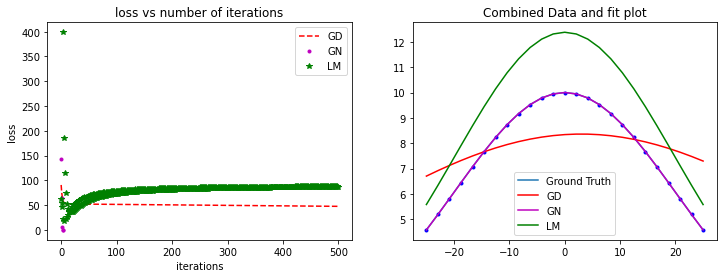

for 28 observations
gradient descent algorithm did'nt converge in  499  iterations for given parameters of tolerance 0.01  learning rate 0.01
loss: 52.05632713234219
a_est: 8.379803078930825  m_est: 2.8184503400714056  s_est: 41.764638563861425
Convergence in Gauss Newton achieved at 4  iteration
loss: 6.428596659169266e-07
a_est: 9.999983193463462  m_est: 0.0001465431171418334  s_est: -19.999352332616247
Gauss Newton Algorithm did'nt converge in  4  iterations for given parameters of tolerance 0.01  learning rate 0.01
loss: 6.428596659169266e-07
a_est: 9.999983193463462  m_est: 0.0001465431171418334  s_est: -19.999352332616247
LM Algorithm did'nt converge in  499  iterations for given parameters of tolerance 10.0  learning rate 0.0
loss: 103.57535256411536
a_est: 12.44998484005651  m_est: -0.0014885966577819036  s_est: 19.807647408673972


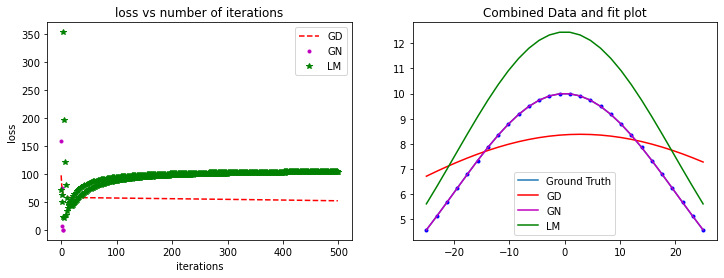

for 30 observations
gradient descent algorithm did'nt converge in  499  iterations for given parameters of tolerance 0.01  learning rate 0.01
loss: 54.95890464869688
a_est: 8.391081485435981  m_est: 2.6923982418891166  s_est: 41.527563857792025
Convergence in Gauss Newton achieved at 4  iteration
loss: 7.713311244321944e-07
a_est: 9.99998444551141  m_est: 7.426136720036641e-05  s_est: -19.999291517644988
Gauss Newton Algorithm did'nt converge in  4  iterations for given parameters of tolerance 0.01  learning rate 0.01
loss: 7.713311244321944e-07
a_est: 9.99998444551141  m_est: 7.426136720036641e-05  s_est: -19.999291517644988
LM Algorithm did'nt converge in  499  iterations for given parameters of tolerance 10.0  learning rate 0.0
loss: 103.54771443108834
a_est: 12.36647489743424  m_est: -0.0014701050550474729  s_est: 19.803769911526967


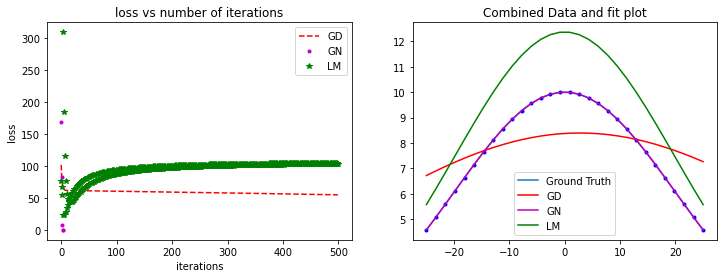

for 34 observations
gradient descent algorithm did'nt converge in  499  iterations for given parameters of tolerance 0.01  learning rate 0.01
loss: 60.56160993564554
a_est: 8.412236317248853  m_est: 2.4494051689631995  s_est: 41.03998883216439
Convergence in Gauss Newton achieved at 4  iteration
loss: 1.0725231352600142e-06
a_est: 9.999982960979157  m_est: -7.247512050717435e-05  s_est: -19.9992106865635
Gauss Newton Algorithm did'nt converge in  4  iterations for given parameters of tolerance 0.01  learning rate 0.01
loss: 1.0725231352600142e-06
a_est: 9.999982960979157  m_est: -7.247512050717435e-05  s_est: -19.9992106865635
LM Algorithm did'nt converge in  499  iterations for given parameters of tolerance 10.0  learning rate 0.0
loss: 94.92628414324274
a_est: 12.13157113257325  m_est: -0.0012907943846796211  s_est: 19.79020304436919


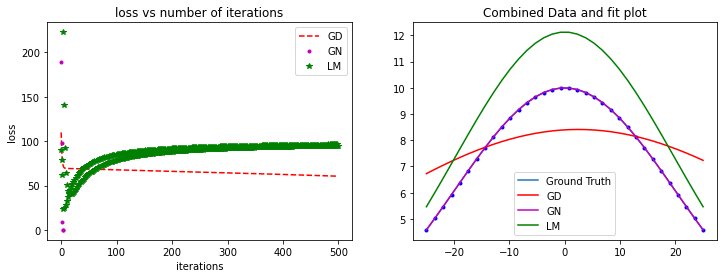

for 38 observations
gradient descent algorithm did'nt converge in  499  iterations for given parameters of tolerance 0.01  learning rate 0.01
loss: 65.87726420200562
a_est: 8.432377121428477  m_est: 2.218497438236343  s_est: 40.53413155689187
Convergence in Gauss Newton achieved at 4  iteration
loss: 1.4356588270651757e-06
a_est: 9.999977541954916  m_est: -0.00021181467977287802  s_est: -19.999170911885173
Gauss Newton Algorithm did'nt converge in  4  iterations for given parameters of tolerance 0.01  learning rate 0.01
loss: 1.4356588270651757e-06
a_est: 9.999977541954916  m_est: -0.00021181467977287802  s_est: -19.999170911885173
LM Algorithm did'nt converge in  499  iterations for given parameters of tolerance 10.0  learning rate 0.0
loss: 92.99688696770764
a_est: 11.997470120003388  m_est: -0.0007096896934044271  s_est: 19.781626550350367


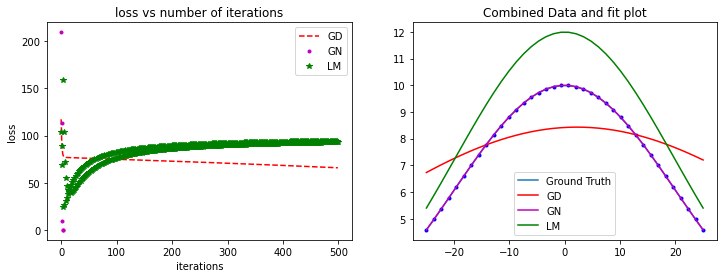

for 42 observations
gradient descent algorithm did'nt converge in  499  iterations for given parameters of tolerance 0.01  learning rate 0.01
loss: 70.88300624034814
a_est: 8.452214384409308  m_est: 1.9996139089782974  s_est: 40.0094189960358
Convergence in Gauss Newton achieved at 4  iteration
loss: 1.8582212141455318e-06
a_est: 9.999969554277271  m_est: -0.00033833304613417603  s_est: -19.999159234519464
Gauss Newton Algorithm did'nt converge in  4  iterations for given parameters of tolerance 0.01  learning rate 0.01
loss: 1.8582212141455318e-06
a_est: 9.999969554277271  m_est: -0.00033833304613417603  s_est: -19.999159234519464
LM Algorithm did'nt converge in  499  iterations for given parameters of tolerance 10.0  learning rate 0.0
loss: 99.47592827560855
a_est: 11.96407539630405  m_est: 0.0002821604308557448  s_est: 19.780376862369213


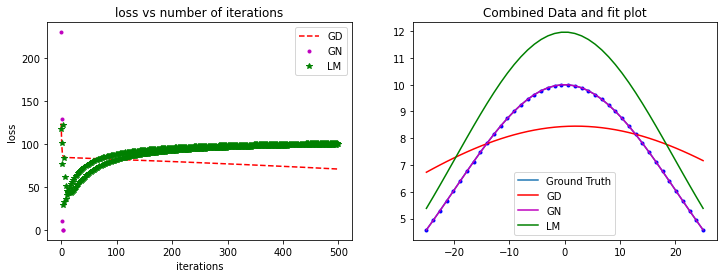

for 48 observations
gradient descent algorithm did'nt converge in  499  iterations for given parameters of tolerance 0.01  learning rate 0.01
loss: 77.75252657343142
a_est: 8.482461982869177  m_est: 1.6937330070250476  s_est: 39.18545204990221
Convergence in Gauss Newton achieved at 4  iteration
loss: 2.589302461919011e-06
a_est: 9.999954855966209  m_est: -0.000501733335743354  s_est: -19.999174698425204
Gauss Newton Algorithm did'nt converge in  4  iterations for given parameters of tolerance 0.01  learning rate 0.01
loss: 2.589302461919011e-06
a_est: 9.999954855966209  m_est: -0.000501733335743354  s_est: -19.999174698425204
LM Algorithm did'nt converge in  499  iterations for given parameters of tolerance 10.0  learning rate 0.0
loss: 127.3912645462199
a_est: 12.072498737573962  m_est: 0.002284057576662439  s_est: 19.79029488031794


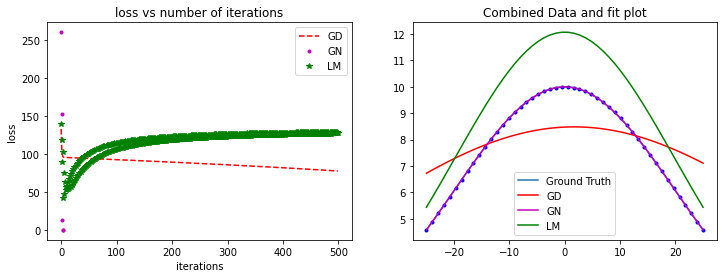

for 50 observations
gradient descent algorithm did'nt converge in  499  iterations for given parameters of tolerance 0.01  learning rate 0.01
loss: 79.85676866608442
a_est: 8.49286292813458  m_est: 1.5977399438723476  s_est: 38.900547294118624
Convergence in Gauss Newton achieved at 4  iteration
loss: 2.8551279852934357e-06
a_est: 9.999949564582622  m_est: -0.000549485613638781  s_est: -19.99918552898828
Gauss Newton Algorithm did'nt converge in  4  iterations for given parameters of tolerance 0.01  learning rate 0.01
loss: 2.8551279852934357e-06
a_est: 9.999949564582622  m_est: -0.000549485613638781  s_est: -19.99918552898828
LM Algorithm did'nt converge in  499  iterations for given parameters of tolerance 10.0  learning rate 0.0
loss: 139.15781206815888
a_est: 12.12002195051453  m_est: 0.0030198301922845765  s_est: 19.794062155516453


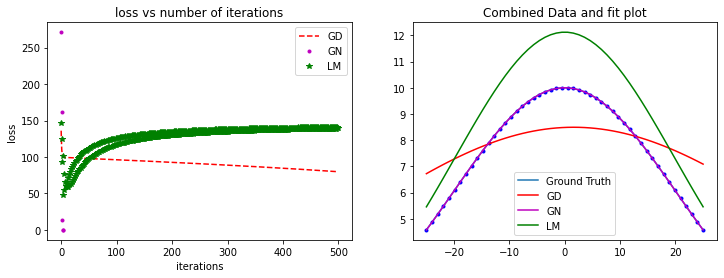

for 52 observations
gradient descent algorithm did'nt converge in  499  iterations for given parameters of tolerance 0.01  learning rate 0.01
loss: 81.86109258021257
a_est: 8.503489685351456  m_est: 1.5047243824542196  s_est: 38.610326788285704
Convergence in Gauss Newton achieved at 4  iteration
loss: 3.1304622226266806e-06
a_est: 9.999944175140818  m_est: -0.0005941448320681483  s_est: -19.999198271901065
Gauss Newton Algorithm did'nt converge in  4  iterations for given parameters of tolerance 0.01  learning rate 0.01
loss: 3.1304622226266806e-06
a_est: 9.999944175140818  m_est: -0.0005941448320681483  s_est: -19.999198271901065
LM Algorithm did'nt converge in  499  iterations for given parameters of tolerance 10.0  learning rate 0.0
loss: 152.14660946279753
a_est: 12.171391413035689  m_est: 0.003762142792259608  s_est: 19.797866295144328


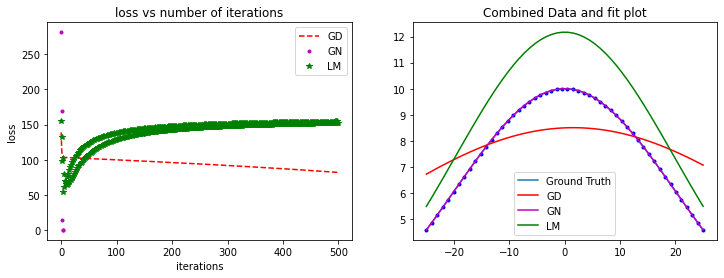

for 55 observations
gradient descent algorithm did'nt converge in  499  iterations for given parameters of tolerance 0.01  learning rate 0.01
loss: 84.66979389564095
a_est: 8.519933155052602  m_est: 1.3707768290828521  s_est: 38.164752830169434
Convergence in Gauss Newton achieved at 4  iteration
loss: 3.5594098808815576e-06
a_est: 9.999935998972074  m_est: -0.0006557349331455034  s_est: -19.999220089665425
Gauss Newton Algorithm did'nt converge in  4  iterations for given parameters of tolerance 0.01  learning rate 0.01
loss: 3.5594098808815576e-06
a_est: 9.999935998972074  m_est: -0.0006557349331455034  s_est: -19.999220089665425
LM Algorithm did'nt converge in  499  iterations for given parameters of tolerance 10.0  learning rate 0.0
loss: 173.30942983376275
a_est: 12.250074240717495  m_est: 0.0048737995302494674  s_est: 19.803262128727265


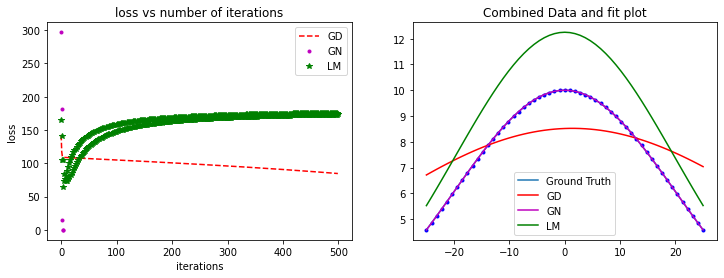

for 60 observations
gradient descent algorithm did'nt converge in  499  iterations for given parameters of tolerance 0.01  learning rate 0.01
loss: 88.77942711417333
a_est: 8.548975867252667  m_est: 1.1623737338267857  s_est: 37.39367278417426
Convergence in Gauss Newton achieved at 4  iteration
loss: 4.310422796194018e-06
a_est: 9.999922384172322  m_est: -0.0007455152165136564  s_est: -19.999261131884314
Gauss Newton Algorithm did'nt converge in  4  iterations for given parameters of tolerance 0.01  learning rate 0.01
loss: 4.310422796194018e-06
a_est: 9.999922384172322  m_est: -0.0007455152165136564  s_est: -19.999261131884314
LM Algorithm did'nt converge in  499  iterations for given parameters of tolerance 10.0  learning rate 0.0
loss: 210.52918338510824
a_est: 12.369599963786957  m_est: 0.006742769902078151  s_est: 19.810649795187665


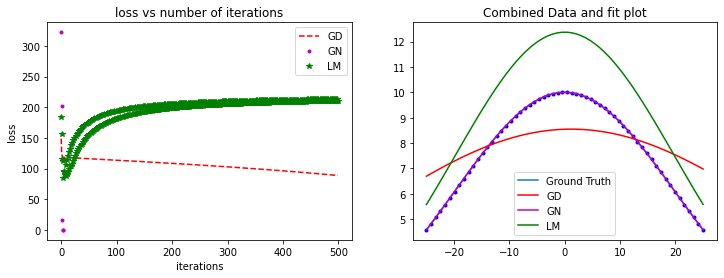

In [9]:
numberOfObservations = np.array([3,5,8,10,12,15,20,22,25,28,30,34,38,42,48,50,52,55,60])
a_gt = 10
m_gt = 0
s_gt = 50
for o in numberOfObservations:
    xObserved = np.linspace(-25, 25, o)
    a_gt = 10
    m_gt = 0
    s_gt = 20
    yObserved = gaussian(xObserved, a_gt, m_gt, s_gt)
    print("for", o,"observations")
    ygd,lgd = gradDescent(xObserved,yObserved,calculatedPrameters,0.01,1e-2)
    ygn,lgn = gaussNewton(xObserved,yObserved,calculatedPrameters,0.01,1e-2)
    ylm,llm= LM(xObserved,yObserved,calculatedPrameters,10,1e+1)
    combinedplot(xObserved,yObserved,ygd,lgd,ygn,lgn,ylm,llm)

Add noise to your observations: Can a particular algorithm handle large noise?

for * 0.0001  noise
gradient descent algorithm did'nt converge in  499  iterations for given parameters of tolerance 0.01  learning rate 0.01
loss: 79.85124125514692
a_est: 8.492755945563886  m_est: 1.5976112998210046  s_est: 38.90101700912468
Convergence in Gauss Newton achieved at 4  iteration
loss: 5.689567755568839e-05
a_est: 9.999797088443964  m_est: -0.0005833190356254458  s_est: -19.999398692997186
Gauss Newton Algorithm did'nt converge in  4  iterations for given parameters of tolerance 0.01  learning rate 0.01
loss: 5.689567755568839e-05
a_est: 9.999797088443964  m_est: -0.0005833190356254458  s_est: -19.999398692997186
LM Algorithm did'nt converge in  499  iterations for given parameters of tolerance 10.0  learning rate 0.0
loss: 138.96855891385403
a_est: 12.118275055850809  m_est: 0.0024367954040725726  s_est: 19.795066893435425


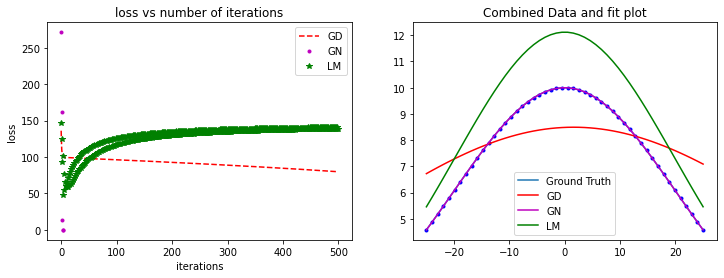

for * 0.0002  noise
gradient descent algorithm did'nt converge in  499  iterations for given parameters of tolerance 0.01  learning rate 0.01
loss: 79.8931063937495
a_est: 8.493262709647803  m_est: 1.5919296847448323  s_est: 38.89903450932816
Convergence in Gauss Newton achieved at 4  iteration
loss: 0.0003067091325058555
a_est: 10.000753813761662  m_est: -0.0030862163205721133  s_est: -19.997484674058896
Gauss Newton Algorithm did'nt converge in  4  iterations for given parameters of tolerance 0.01  learning rate 0.01
loss: 0.0003067091325058555
a_est: 10.000753813761662  m_est: -0.0030862163205721133  s_est: -19.997484674058896
LM Algorithm did'nt converge in  499  iterations for given parameters of tolerance 10.0  learning rate 0.0
loss: 138.9977374732768
a_est: 12.119440247120327  m_est: -0.0004478990071316736  s_est: 19.79359444544201


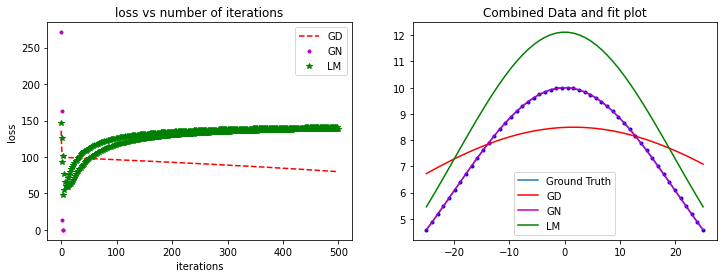

for * 0.001  noise
gradient descent algorithm did'nt converge in  499  iterations for given parameters of tolerance 0.01  learning rate 0.01
loss: 79.72641730314827
a_est: 8.49300579172171  m_est: 1.5880259114726925  s_est: 38.90794505092057
Convergence in Gauss Newton achieved at 4  iteration
loss: 0.004024275150309936
a_est: 9.998699153928268  m_est: -0.00337070852463376  s_est: -20.0079072910997
Gauss Newton Algorithm did'nt converge in  4  iterations for given parameters of tolerance 0.01  learning rate 0.01
loss: 0.004024275150309936
a_est: 9.998699153928268  m_est: -0.00337070852463376  s_est: -20.0079072910997
LM Algorithm did'nt converge in  499  iterations for given parameters of tolerance 10.0  learning rate 0.0
loss: 139.45803270998178
a_est: 12.121932077147843  m_est: -0.01987182420464344  s_est: 19.796565886566437


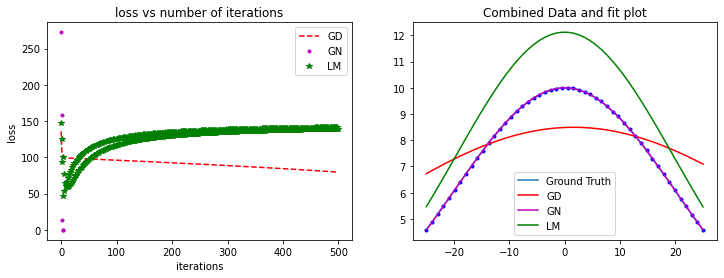

for * 0.002  noise
gradient descent algorithm did'nt converge in  499  iterations for given parameters of tolerance 0.01  learning rate 0.01
loss: 80.32033312934786
a_est: 8.49011324327194  m_est: 1.6307954312970825  s_est: 38.87447913884925
Gauss Newton Algorithm did'nt converge in  499  iterations for given parameters of tolerance 0.01  learning rate 0.01
loss: 0.015917602463120628
a_est: 10.001634987346813  m_est: 0.018002608401187316  s_est: -19.970216047824202
LM Algorithm did'nt converge in  499  iterations for given parameters of tolerance 10.0  learning rate 0.0
loss: 142.63123293501496
a_est: 12.150826990065404  m_est: 0.0037150961898925854  s_est: 19.753885923897055


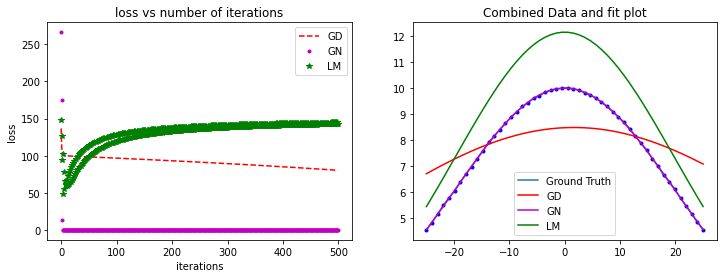

for * 0.01  noise
gradient descent algorithm did'nt converge in  499  iterations for given parameters of tolerance 0.01  learning rate 0.01
loss: 78.86547861398249
a_est: 8.497814959382325  m_est: 1.7916676701449084  s_est: 38.94942661696929
Gauss Newton Algorithm did'nt converge in  499  iterations for given parameters of tolerance 0.01  learning rate 0.01
loss: 0.5813114324373084
a_est: 9.986721882652903  m_est: 0.07602439791978767  s_est: -20.095528898299793
LM Algorithm did'nt converge in  499  iterations for given parameters of tolerance 10.0  learning rate 0.0
loss: 165.23560130127132
a_est: 12.324369898492561  m_est: 0.21100460087700765  s_est: 19.704867773295696


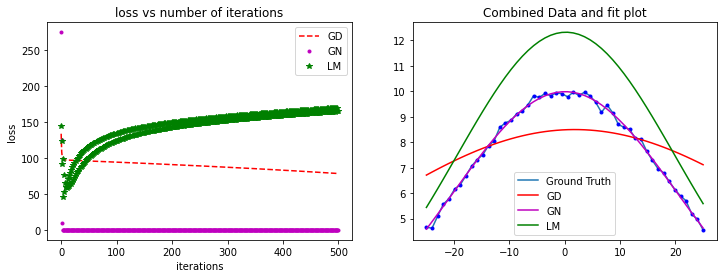

In [10]:
noise_arr = [1/10000,1/5000,1/1000,1/500,1/100]
o = 50
for n in noise_arr:
    xObserved = np.linspace(-25, 25, o)
    a_gt = 10
    m_gt = 0
    s_gt = 20
    yObserved = gaussian(xObserved, a_gt, m_gt, s_gt)+np.random.normal(0,a_gt*n,o)
    print("for *", n," noise")
    ygd,lgd = gradDescent(xObserved,yObserved,calculatedPrameters,0.01,1e-2)
    ygn,lgn = gaussNewton(xObserved,yObserved,calculatedPrameters,0.01,1e-2)
    ylm,llm= LM(xObserved,yObserved,calculatedPrameters,10,1e+1)
    combinedplot(xObserved,yObserved,ygd,lgd,ygn,lgn,ylm,llm)
    

For higer noise , nonce converge, for low and medium noise only Gauss Newton converges, given learning rate and tolerance kept fixed for convergence on initial conditions of no noise

## Answers for Question 1
Add explanations for the answers along with tables here.
### Answer for 1.1
Explain your experimentations with justification here

| Learning rate        | tolerance           | loss  |num of iterations to converge |
| ------------- |:-------------:| -------:|-------:|
| 0.01    | 1e-2     | 0.00983855224832958 |437 |

### Answer for 1.2
**Learning rate** 0.01 for Gradient Descent and Gauss Newton
10 for LM <br>
**tolerance** 1e-2 for Gradient Descent and Gauss Newton
1e+1 for LM <br>
The Gradient Descent, Gauss Newton and LM converge for above values in given extimate of  s_gt = 20, a_est = 10, m_est = 13, s_est = 19.12 and 50 observations. <br>
Thus learning rate and tolerance kept fixed for below experimentations in order to find a good comparison of changes from initial convergence. Also in row (for Different initial estimate say) only that row's mentioned change is there, rest all params are kept fixed.


| Action      |  Gradient Descent          | Gauss Newton  |LM   |
| ------------- |:-------------:| -------:|-------:|
| #Iterations(for tolerance 1e-2) | 437(loss: 0.0098)    | 3(loss: ~0)|  doesnt converge |
| #Iterations(tolerance 1e-1) | 337(loss: 0.098)   | 3(loss: ~0)|  doesnt converge |
| #Iterations(tolerance 1) | 229(loss:0.987)   | 2(loss: 0.933)|  doesnt converge |
| #Iterations(tolerance 1e+1) | 115 (loss: 9.829)   | 2(loss: 0.933)|  2(loss: 5.73) |
| Different Initial estimate: far different  | does'nt converge     | converges|does'nt converge |
| bit different |converges| converges|doesnt converge|
| Different number of observations: v small(<5)  | does'nt converge     | converges|converges |
| small(<=20) |does'nt converge | converges|converges|
| medium(<=42) |does'nt converge | converges|converges|
| large(>=48) |converges | converges|converges|
| on adding small noise  | does'nt converge     | converges|does'nt converge |
| on adding medium noise  | does'nt converge     | does'nt converge|does'nt converge |




# Question 2: ICP Coding
Implement basic ICP algorithm with (given) known correspondences. 

Let X be your point cloud observed from the initial position. Your robot moved and observed P1 as your current point cloud. Same with P2 under a different transformation. Now you wish to apply ICP to recover transformation between (X & P1) and (X & P2). Use *root mean squared error (rmse)* as the error metric.

In [11]:
# HELPER FUNCTIONS: DON'T EDIT THIS BLOCK - If you want to test on more cases, you can add code to this block but
# DON'T delete existing code.


# Visualizing ICP registration
def plot_icp(X, P, P0, i, rmse):
  plt.cla()
  plt.scatter(X[0,:], X[1,:], c='k', marker='o', s=50, lw=0)
  plt.scatter(P[0,:], P[1,:], c='r', marker='o', s=50, lw=0)
  plt.scatter(P0[0,:], P0[1,:], c='b', marker='o', s=50, lw=0)
  plt.legend(('X', 'P', 'P0'), loc='lower left')
  plt.plot(np.vstack((X[0,:], P[0,:])), np.vstack((X[1,:], P[1,:])) ,c='k')
  plt.title("Iteration: " + str(i) + "  RMSE: " + str(rmse))
  plt.axis([-10, 15, -10, 15])
  plt.gca().set_aspect('equal', adjustable='box')
  plt.draw()
  plt.pause(2)
  return

# Generating data for our simple ICP
def generate_data():
  
  # create reference data  
  X = np.array([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 9, 9, 9, 9, 9, 9],
                [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,-1,-2,-3,-4,-5]])
  
  # add noise
  P = X + 0.05 * np.random.normal(0, 1, X.shape)
  
  # translate
  P[0,:] = P[0,:] + 1
  P[1,:] = P[1,:] + 1
  
  # rotate
  theta1 = ( 10.0 / 360) * 2 * np.pi
  theta2 = (110.0 / 360) * 2 * np.pi
  rot1 = np.array([[math.cos(theta1), -math.sin(theta1)],
                   [math.sin(theta1),  math.cos(theta1)]])
  rot2 = np.array([[math.cos(theta2), -math.sin(theta2)],
                   [math.sin(theta2),  math.cos(theta2)]])
  
  # sets with known correspondences
  P1 = np.dot(rot1, P)
  P2 = np.dot(rot2, P)
  
  return X, P1, P2

In [12]:
# TODO: Do tasks described in Q2                                             #
##############################################################################
# Replace "pass" statement with your code
def rms(X,P):
    return np.sqrt(np.sum(np.square(X-P))/X.shape[1])
def centroid(arr):
    return np.mean(arr, axis=1)
    #return (1/arr.shape[0])*np.sum(X)
# TODO1: Get data X, P1, P2 from helper function generate_data(). 
X, P1, P2 = generate_data()
# TODO2: Apply ICP between X and P_i. (in our case,(X & P1) and (X & P2))
def ICP(X, P):
    num_iter = 5 #Experiment & check if your theoretical understanding is correct.
    P0 = P #Initialization
    for i in range(num_iter):
        # implementing ICP:
        # TODO2.1: what's current error?
        rmse = rms(X,P)
        # TODO2.2: call visualization helper function plot_icp.
        plot_icp(X, P, P0, i, rmse)
        # TODO2.3: Implement ICP to get R, t
        #Compute the centroids of each point cloud
        ux = centroid(X)
        ux = ux.reshape(ux.shape[0],1)
        up = centroid(P)
        up = up.reshape(up.shape[0],1)
        #Compute a matrix capturing the spread of the two point clouds
        w = (1/X.shape[1])*np.dot((X.astype(np.float)- ux),(P.astype(np.float)- up).T)
        #Use the singular value decomposition of the matrix to get the optimal rotation
        u, s, v_t = np.linalg.svd(w, full_matrices=True)
#         d = np.linalg.det(u)*np.linalg.det(v_t)  
#         R = np.array([[1,0],[0,d]])
        R = u @ v_t
        #Use the optimal rotation to get the optimal translation by aligning the centroids
        t = (ux - R@up)
        t = t.reshape(t.shape[0],1)
        P = np.dot(R,P) + t #Uncomment this: transforming my current point cloud towards initial point cloud
    return
##############################################################################
#                             END OF YOUR CODE                               #
##############################################################################

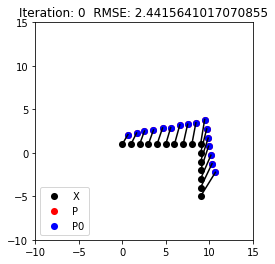

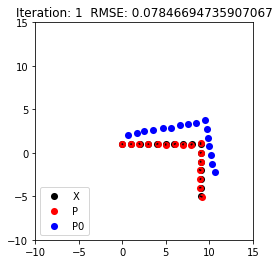

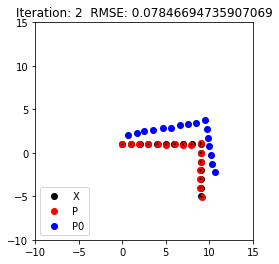

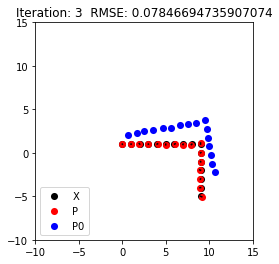

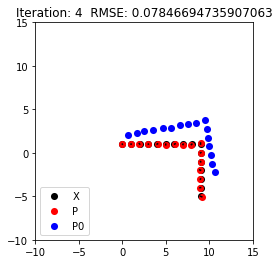

In [13]:
# Call ICP on P1 & P2
ICP(X,P1) 



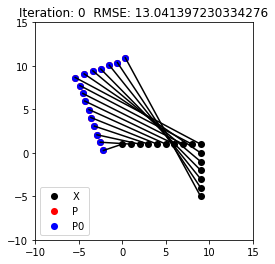

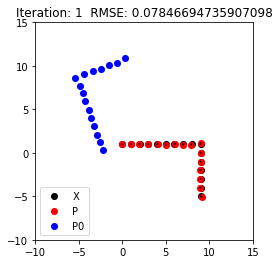

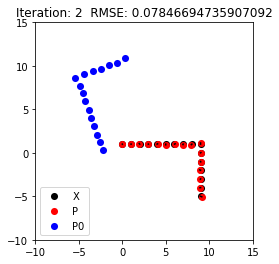

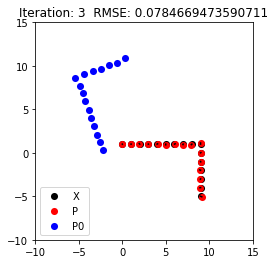

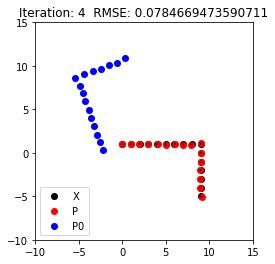

In [14]:
ICP(X,P2) 